In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1248,2020-08-08,United Kingdom,309198.0,309005.0,46522.0,46511.0,193.0,11.0
1249,2020-08-08,Germany,215193.0,215336.0,9196.0,9195.0,-143.0,1.0
1250,2020-08-08,Iran,323790.0,322567.0,18103.0,18132.0,1223.0,-29.0
1251,2020-08-08,Turkey,238321.0,238450.0,5816.0,5813.0,-129.0,3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  4490.500399042298
RMSE =  15825.861497450067


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  286.3758978451716
RMSE =  680.3623342205369


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  27241.8
RMSE =  48189.56251772784
-- World performances for deaths --
MAE =  1543.7583333333334
RMSE =  1892.4058783287833


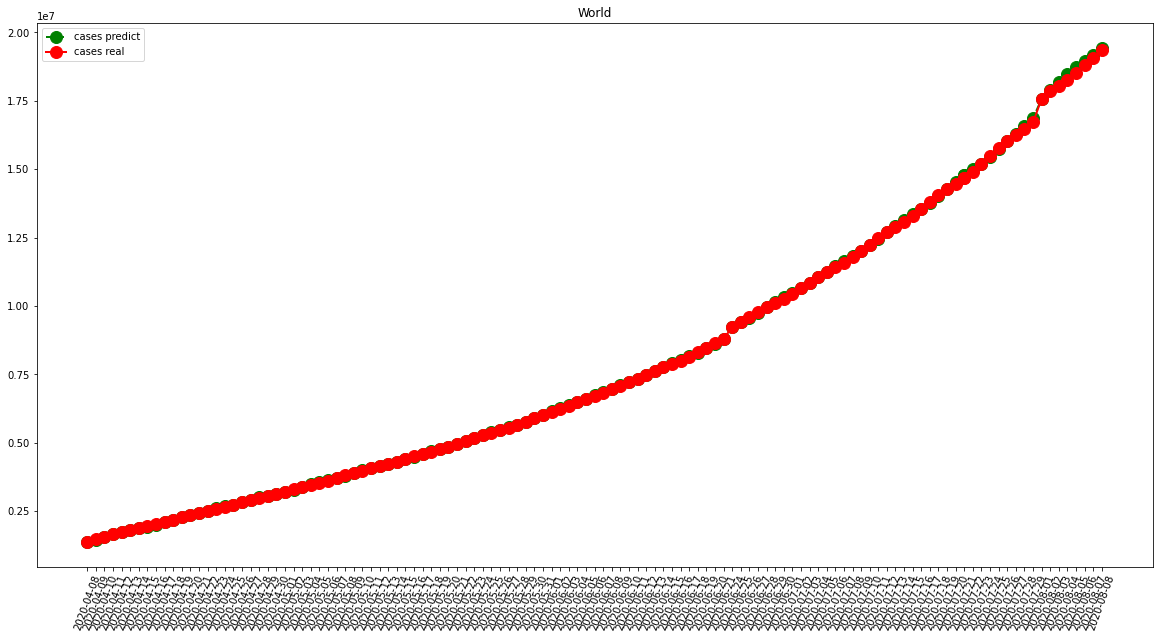

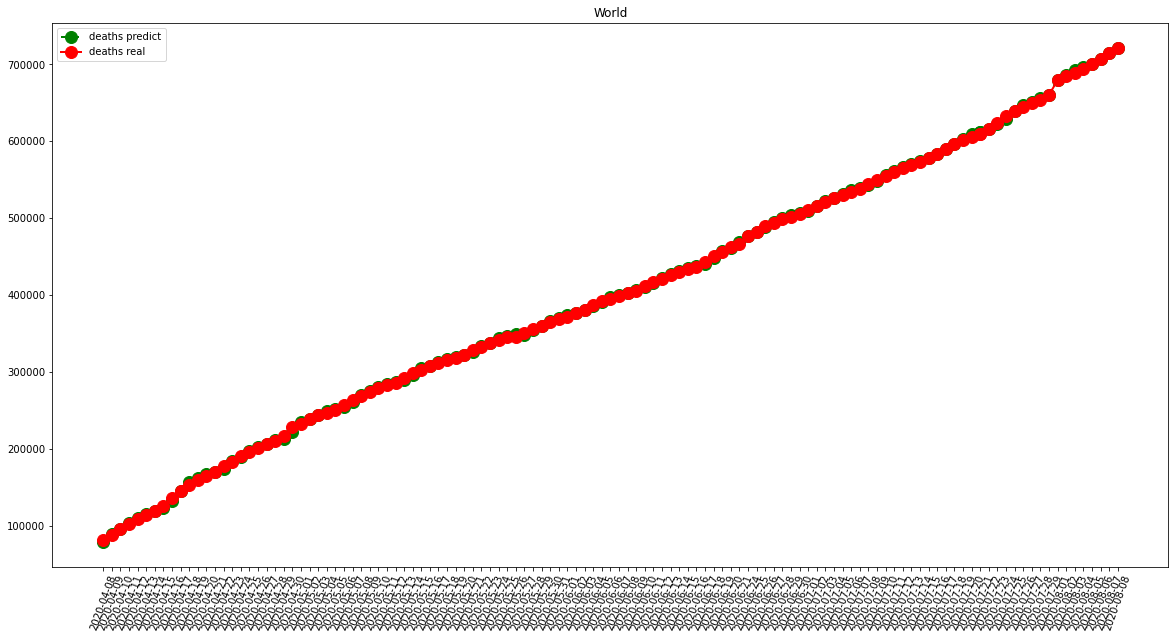

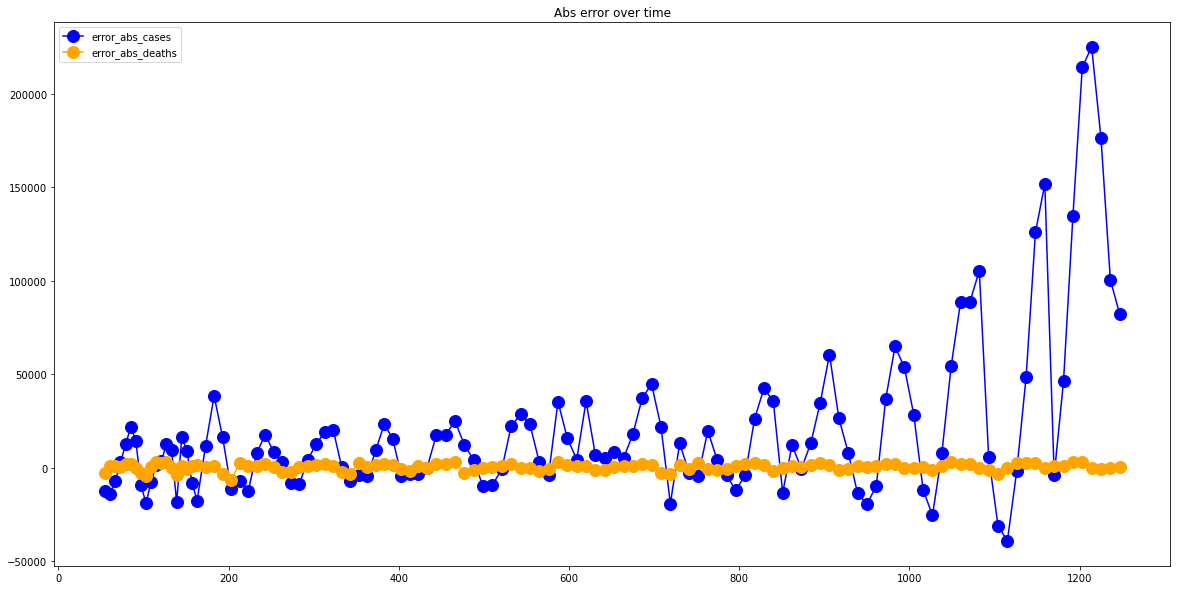

In [7]:
visShow("World")

-- France performances for cases --
MAE =  871.5
RMSE =  1374.5565578648377
-- France performances for deaths --
MAE =  140.2153846153846
RMSE =  294.01768654283364


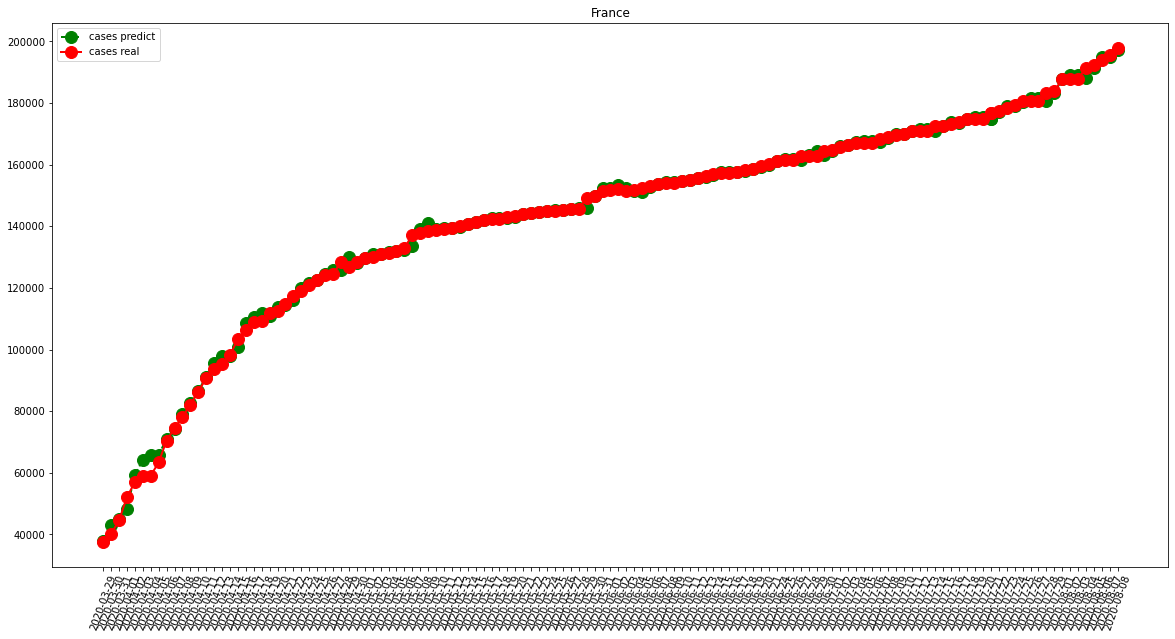

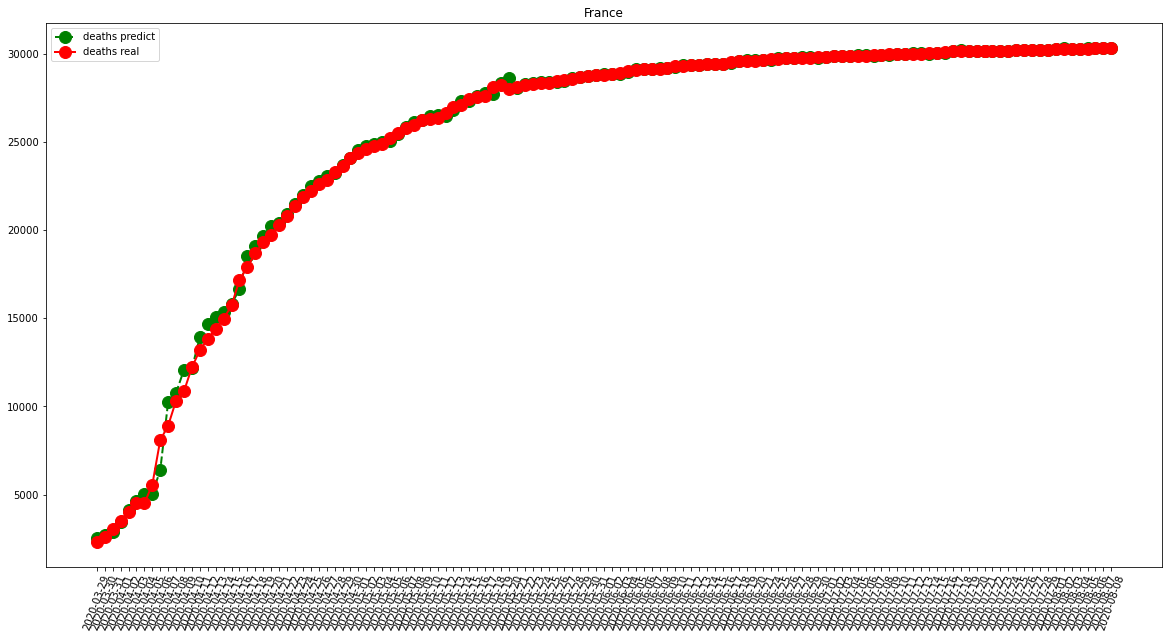

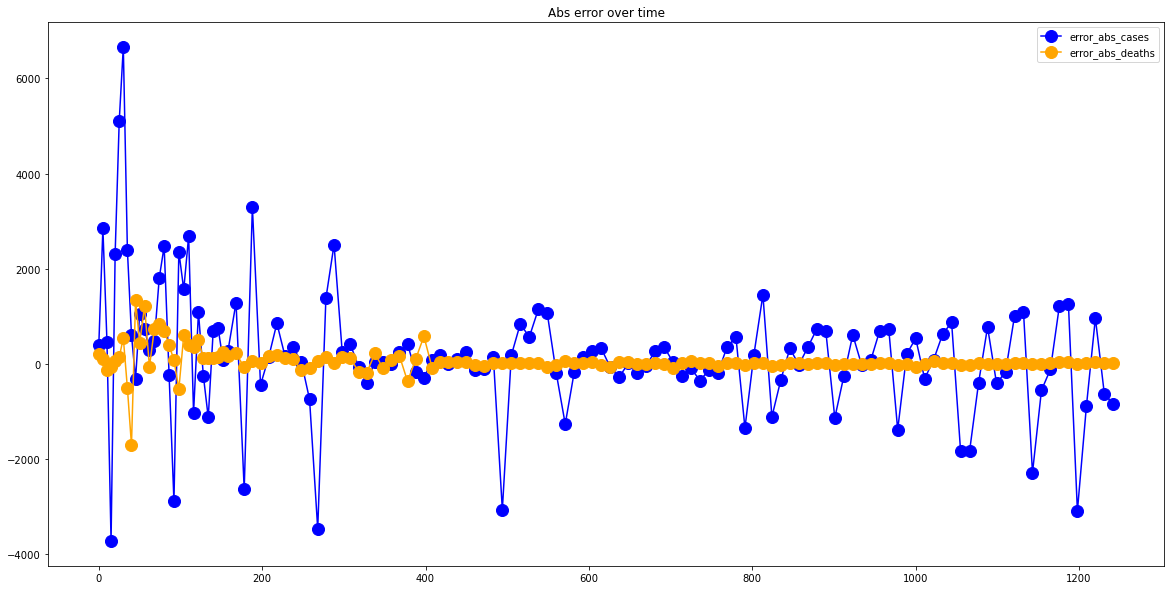

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  316.6923076923077
RMSE =  480.9485819311026
-- Italy performances for deaths --
MAE =  80.41538461538461
RMSE =  259.6339434961935


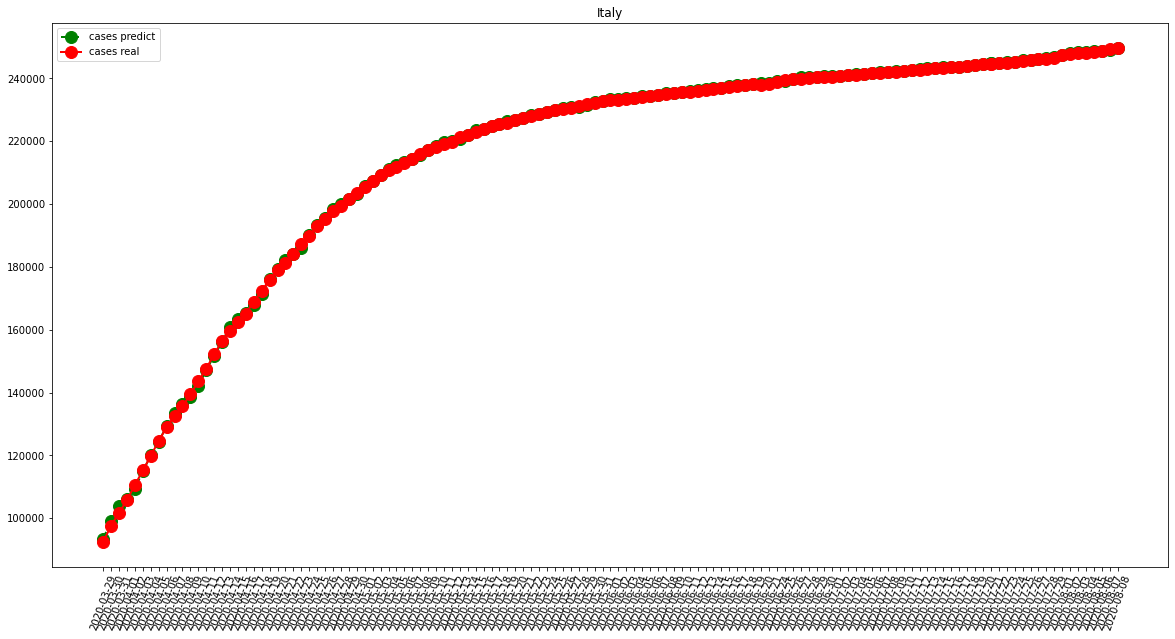

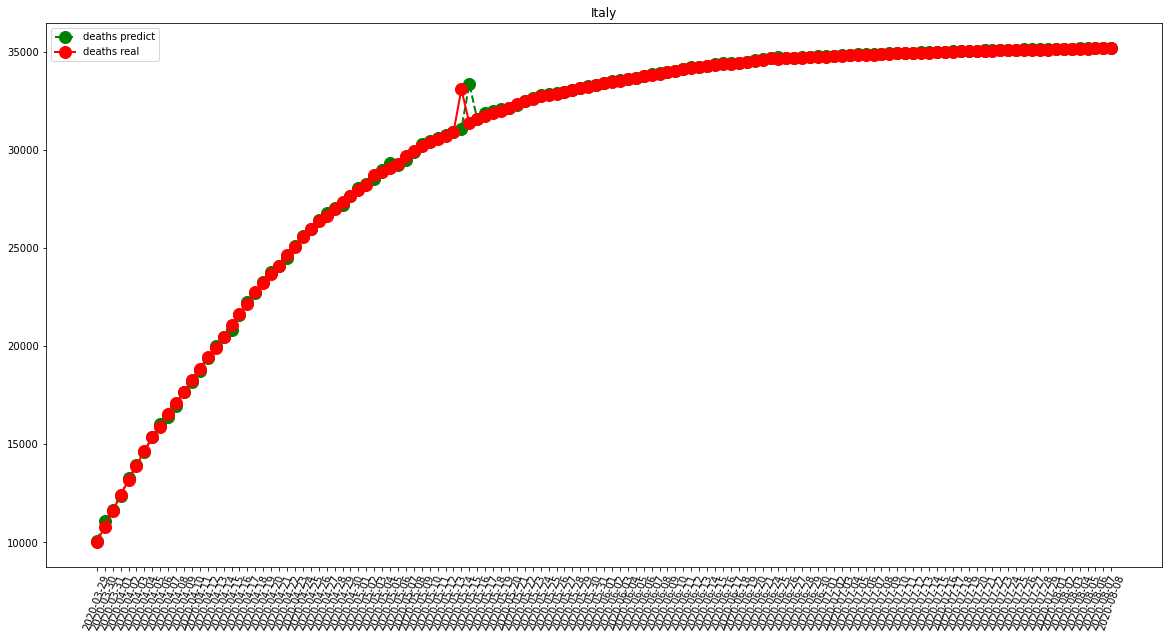

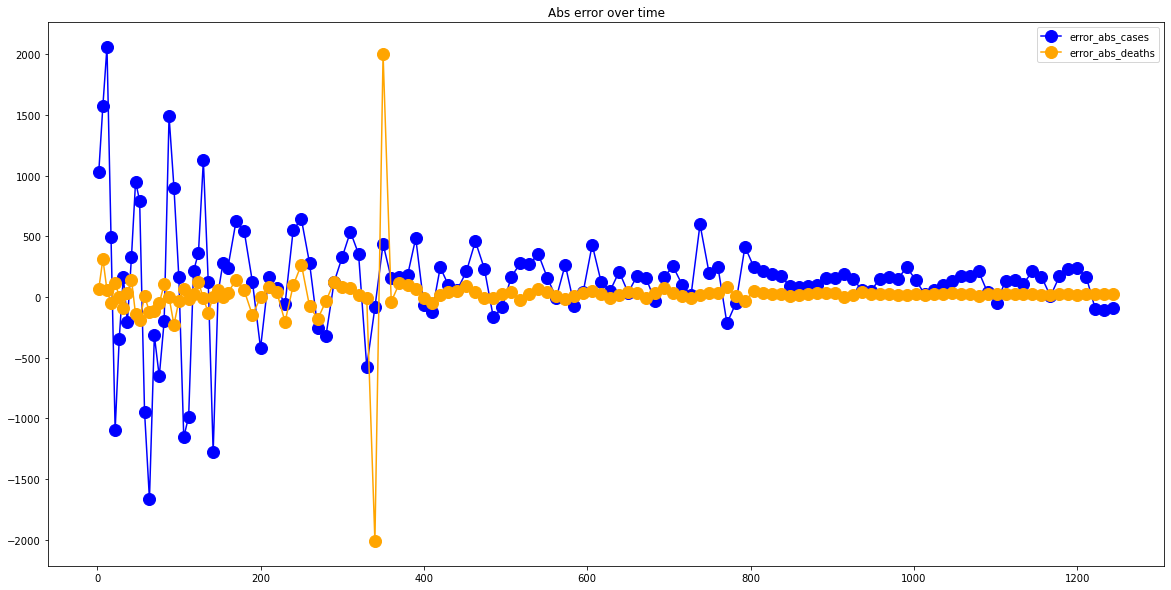

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1158.7692307692307
RMSE =  2276.0901597662196
-- Spain performances for deaths --
MAE =  142.5076923076923
RMSE =  356.0444656759343


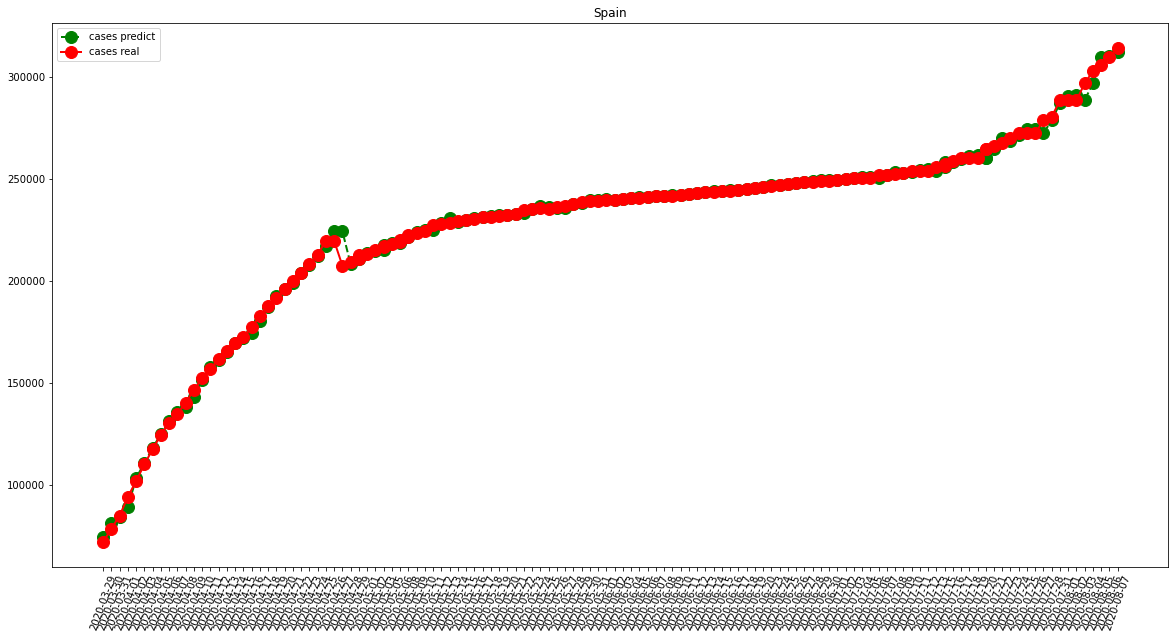

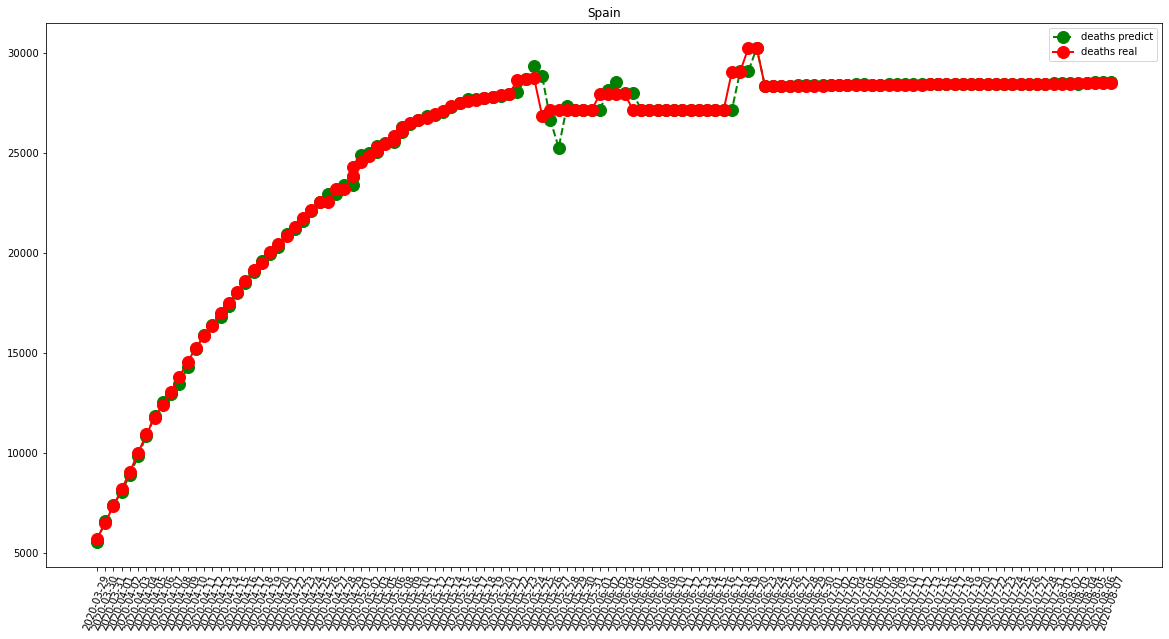

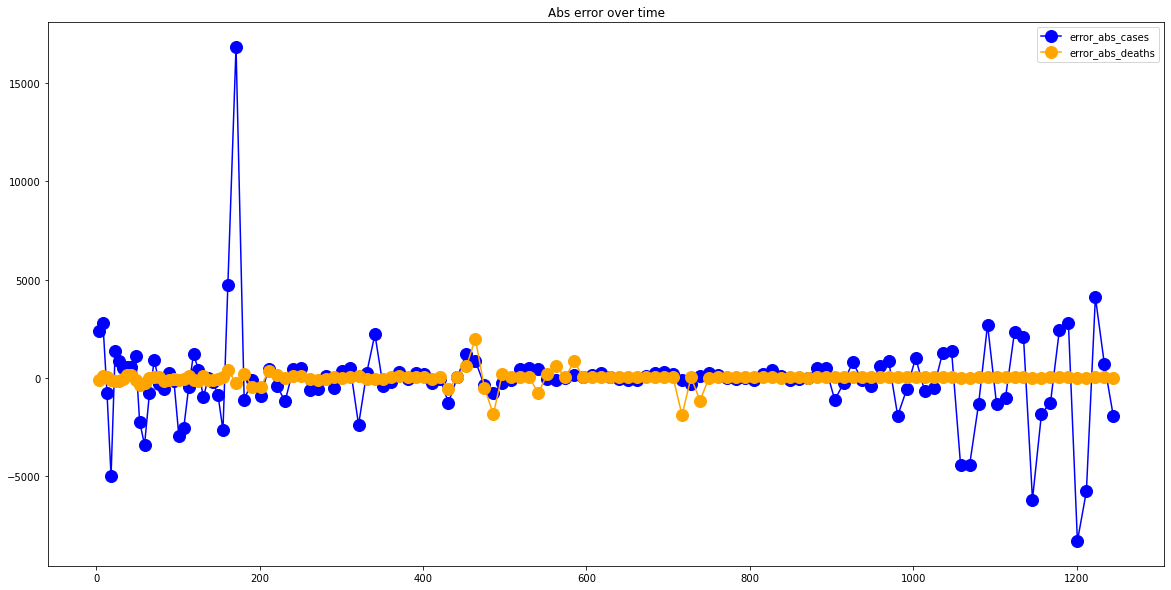

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  6992.846153846154
RMSE =  10111.327642417078
-- United States performances for deaths --
MAE =  501.8615384615385
RMSE =  720.0508315389962


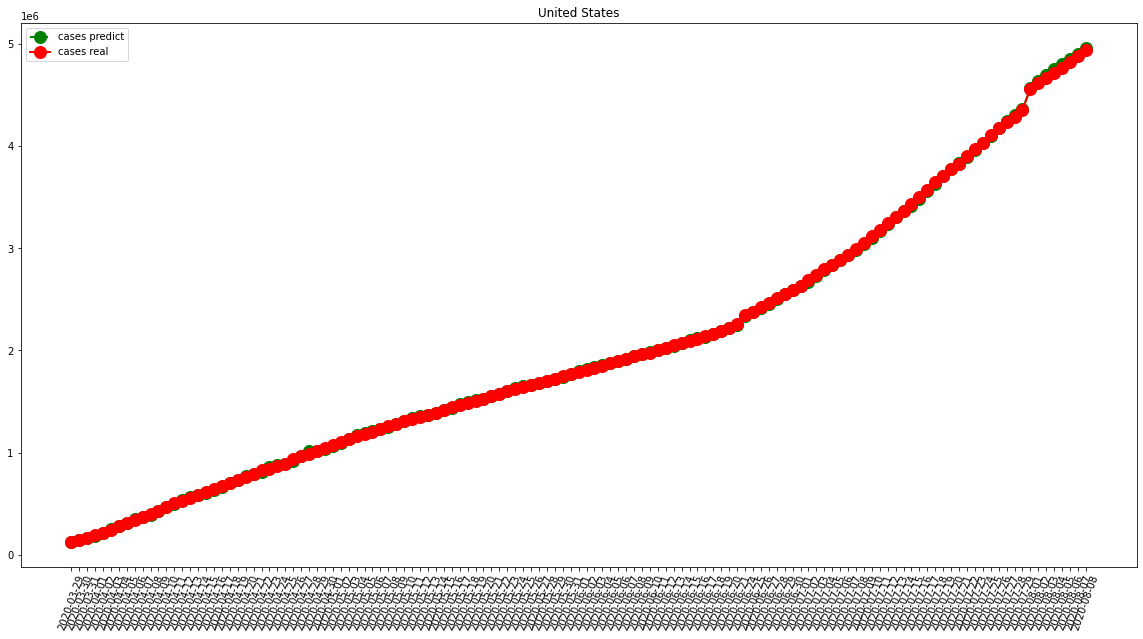

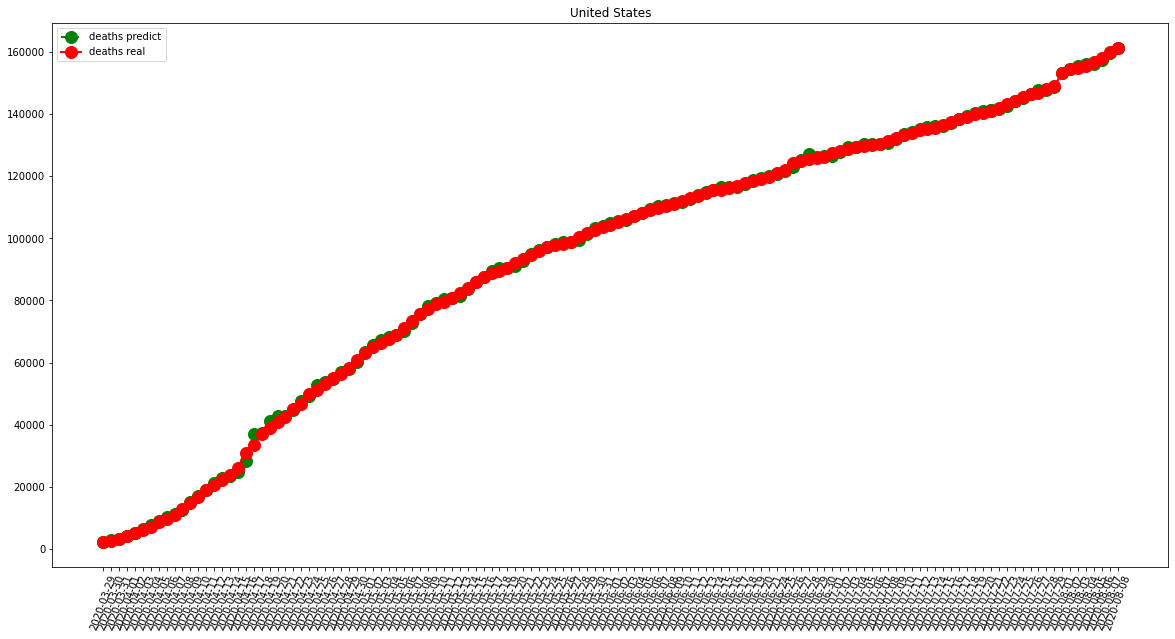

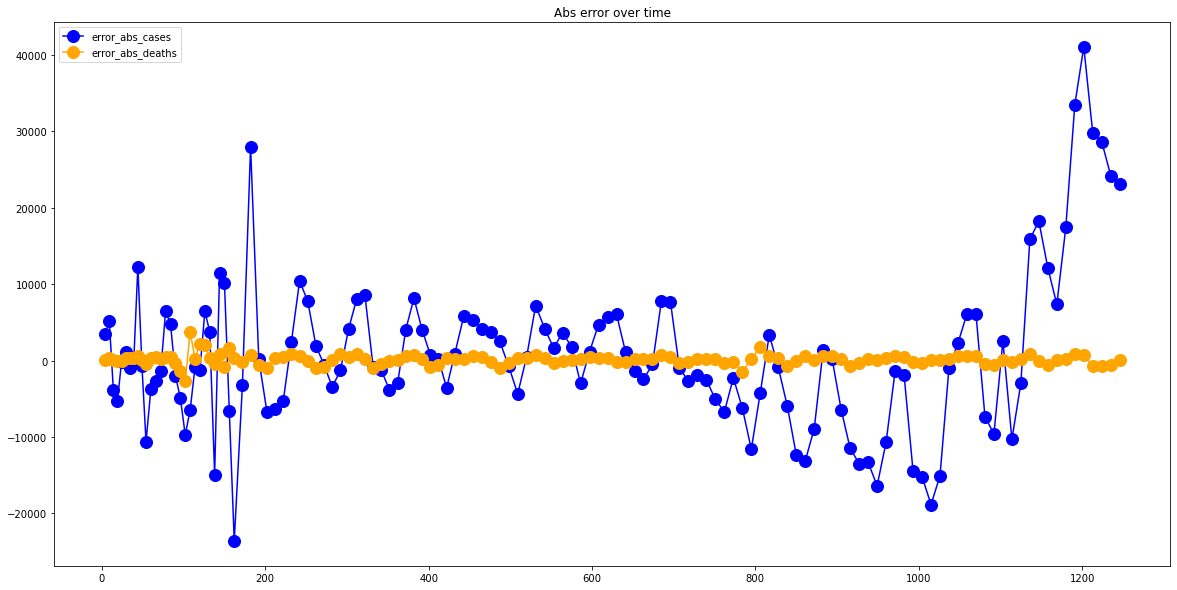

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  74.9
RMSE =  104.43558927727801
-- China performances for deaths --
MAE =  31.2
RMSE =  137.70023183042883


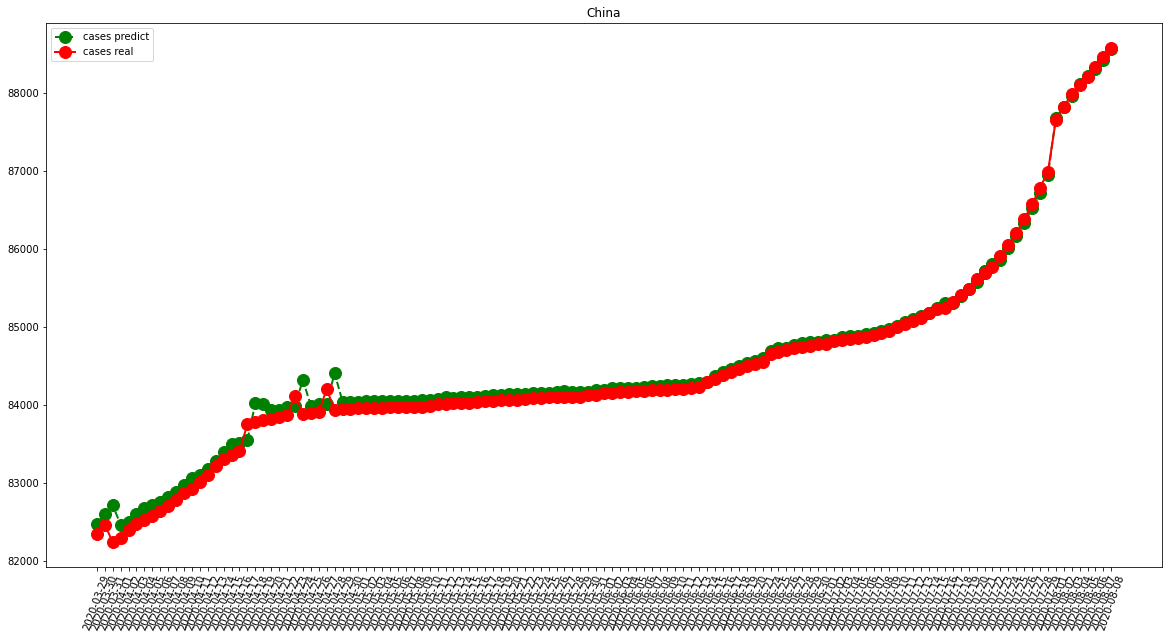

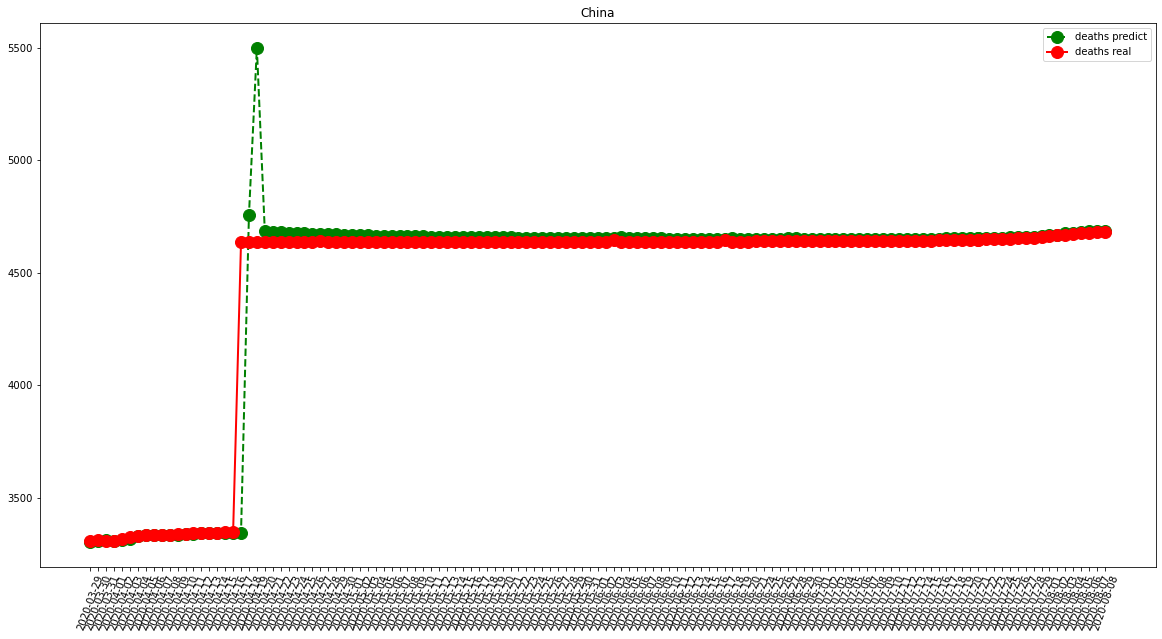

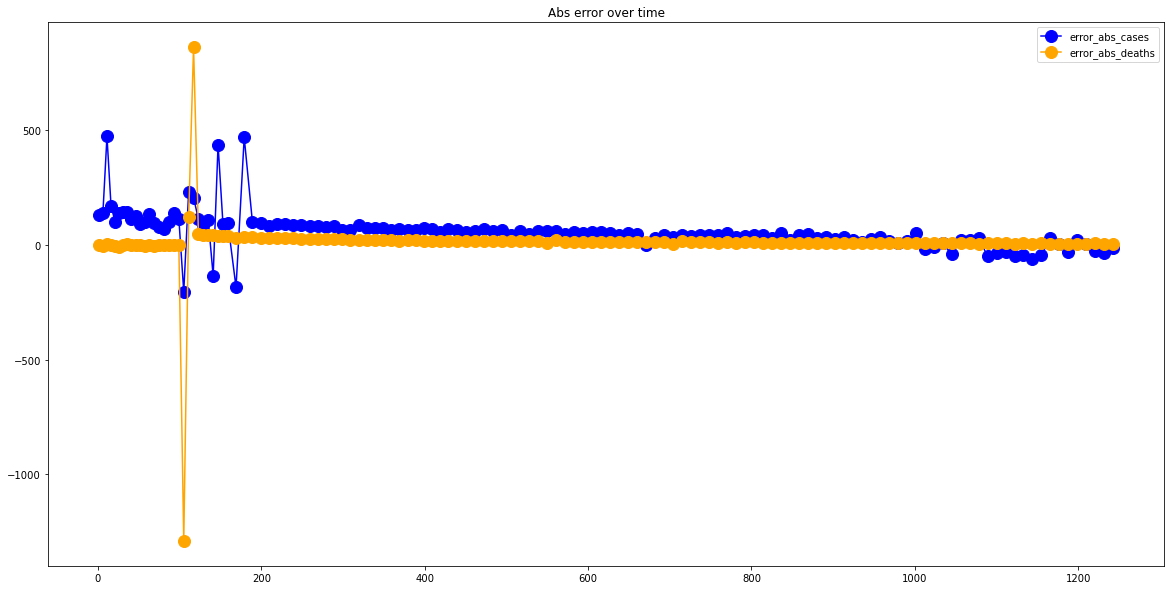

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1214.421568627451
RMSE =  4132.866086414522
-- United Kingdom performances for deaths --
MAE =  191.34313725490196
RMSE =  486.3374423619235


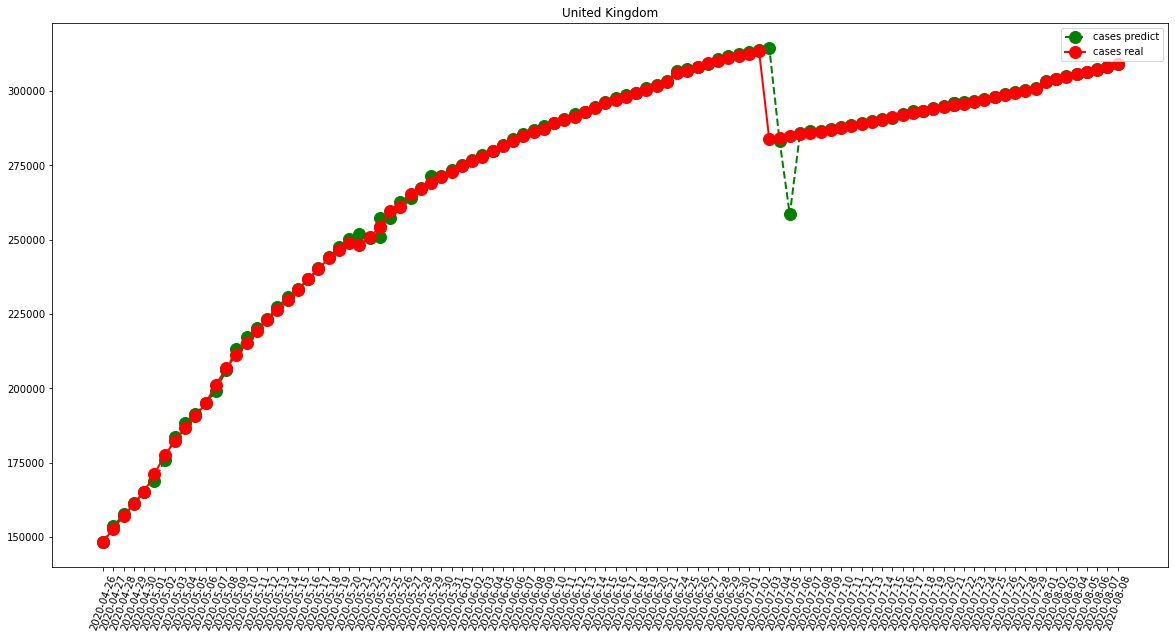

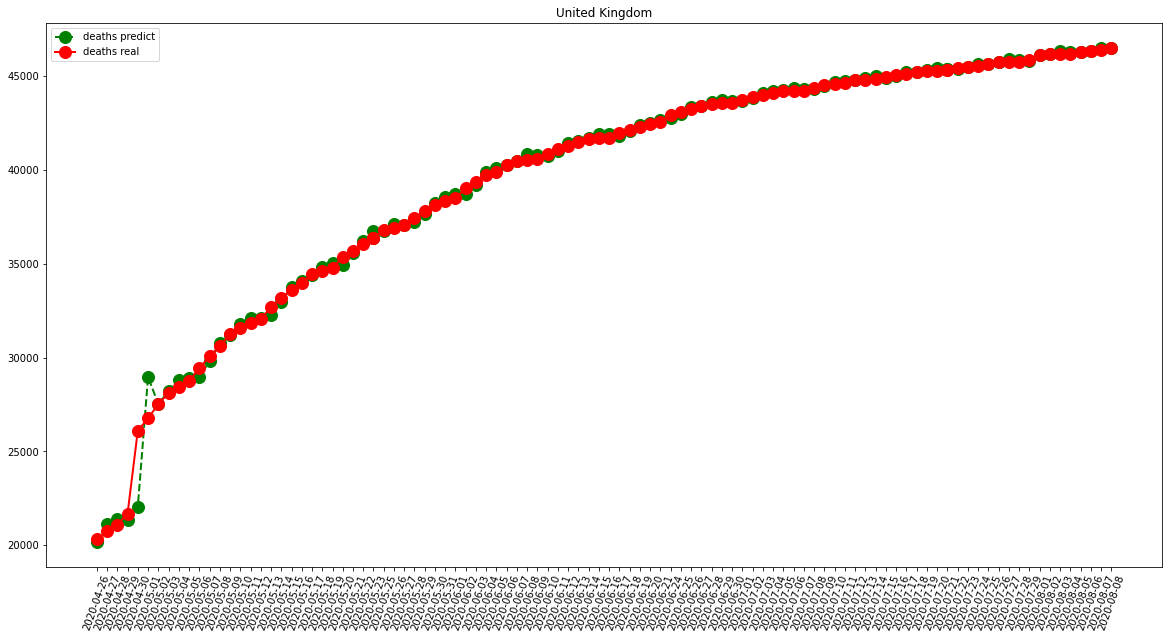

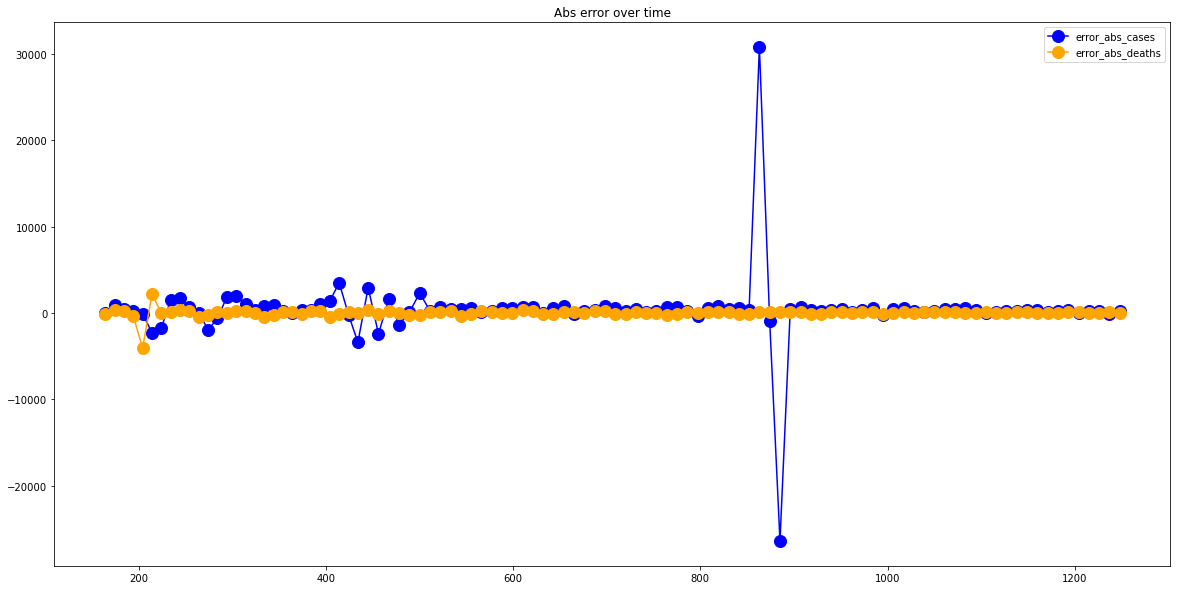

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  312.51960784313724
RMSE =  438.3234211956138
-- Germany performances for deaths --
MAE =  24.137254901960784
RMSE =  43.350147567426426


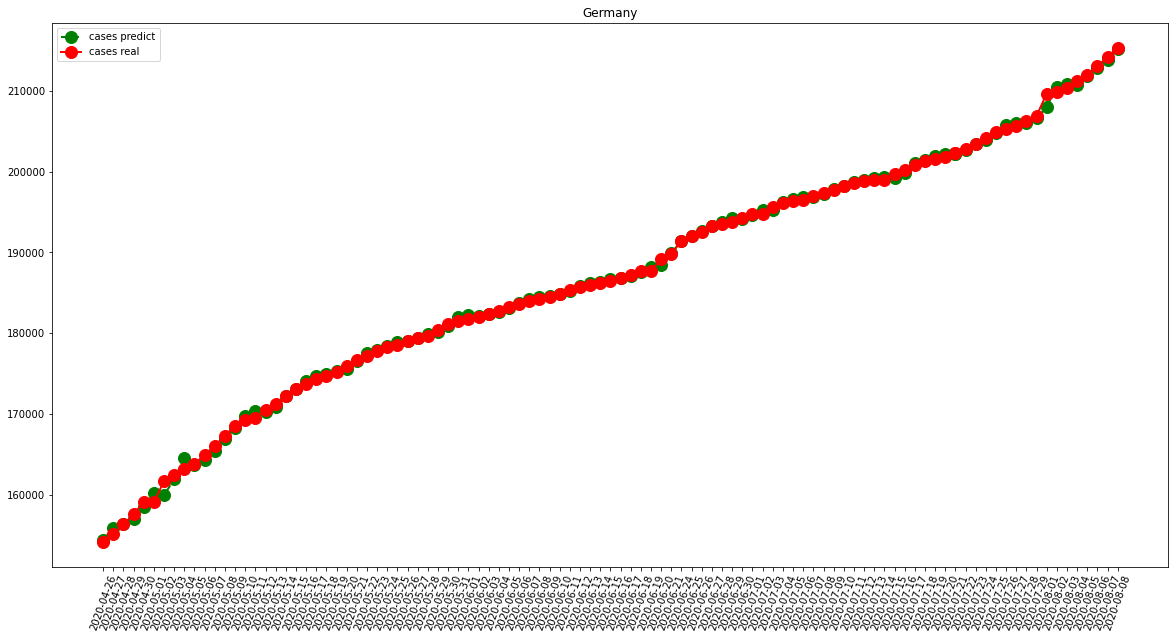

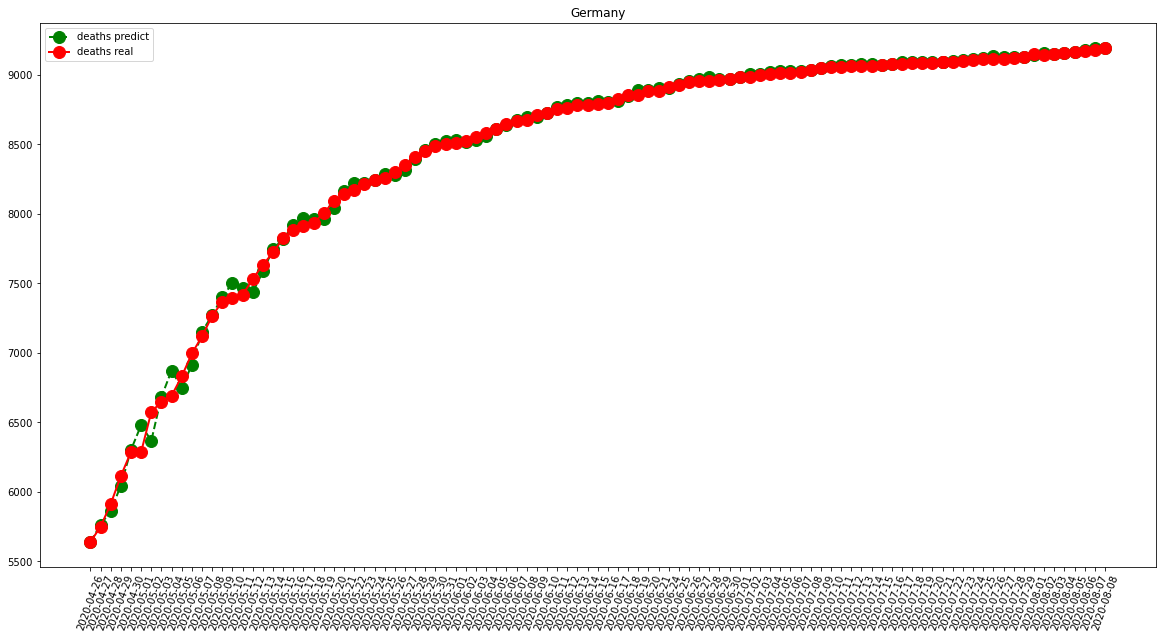

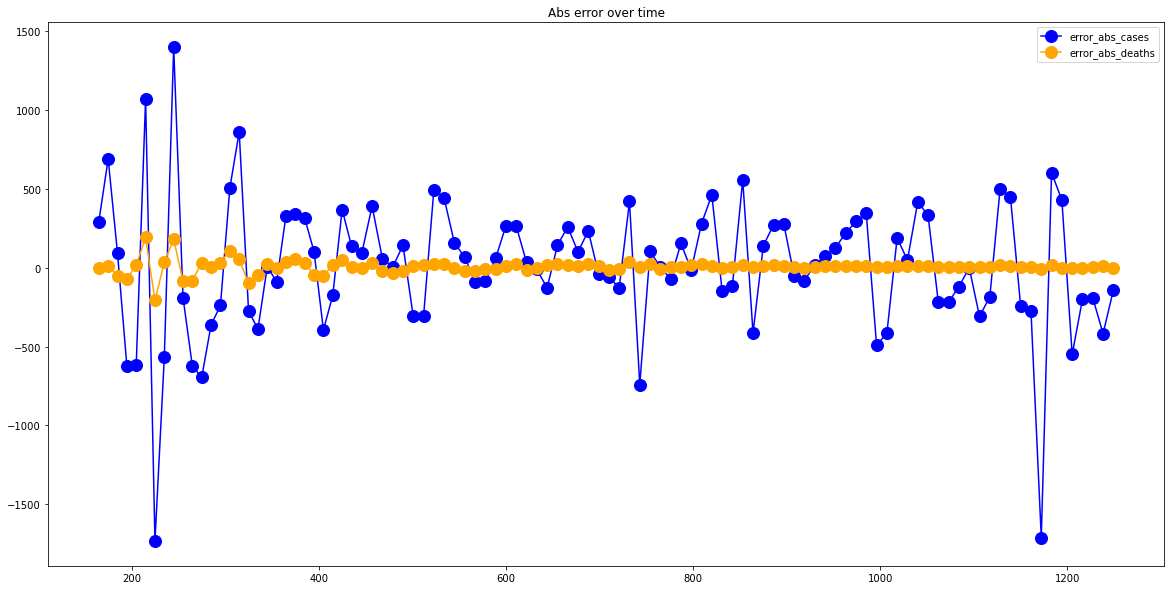

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  578.0
RMSE =  879.0211133113122
-- Iran performances for deaths --
MAE =  32.05882352941177
RMSE =  70.66449312232625


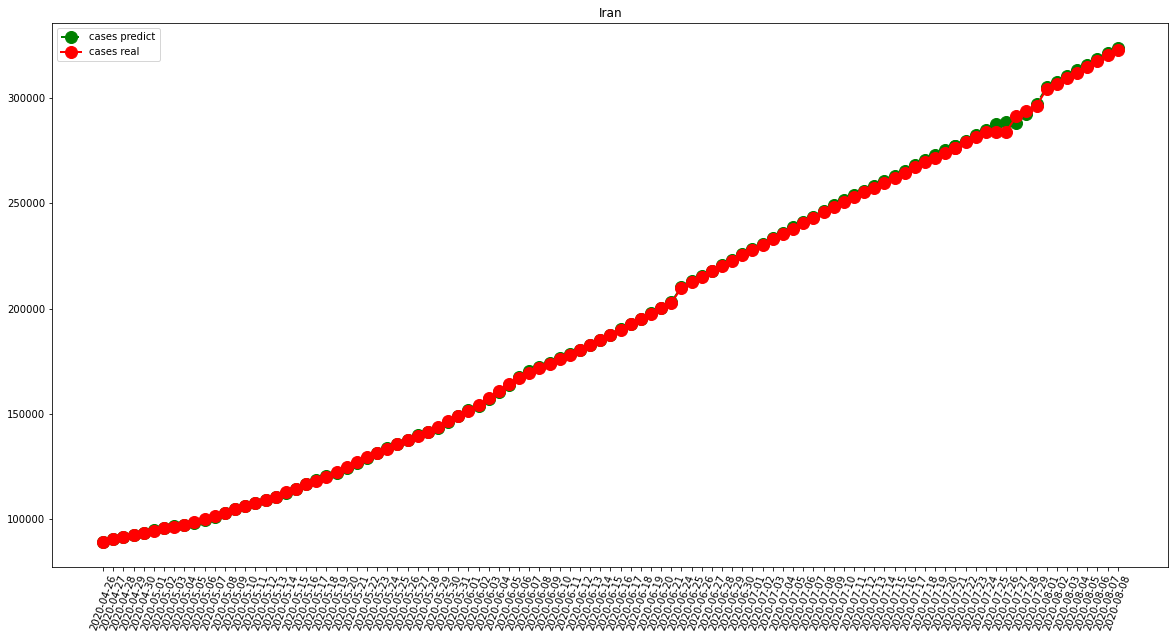

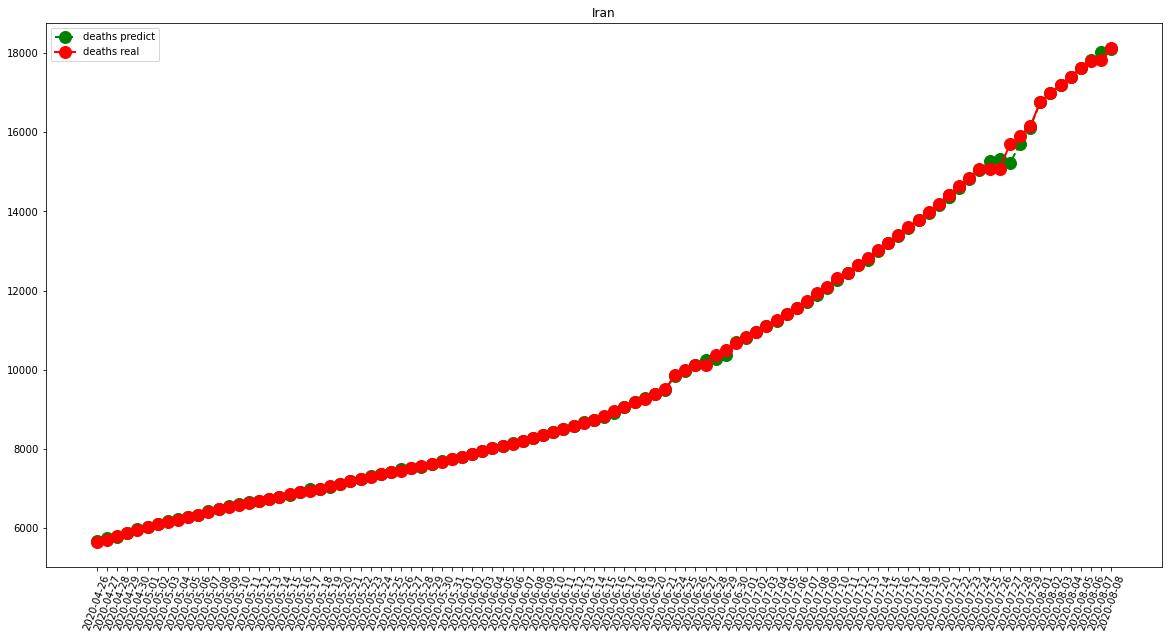

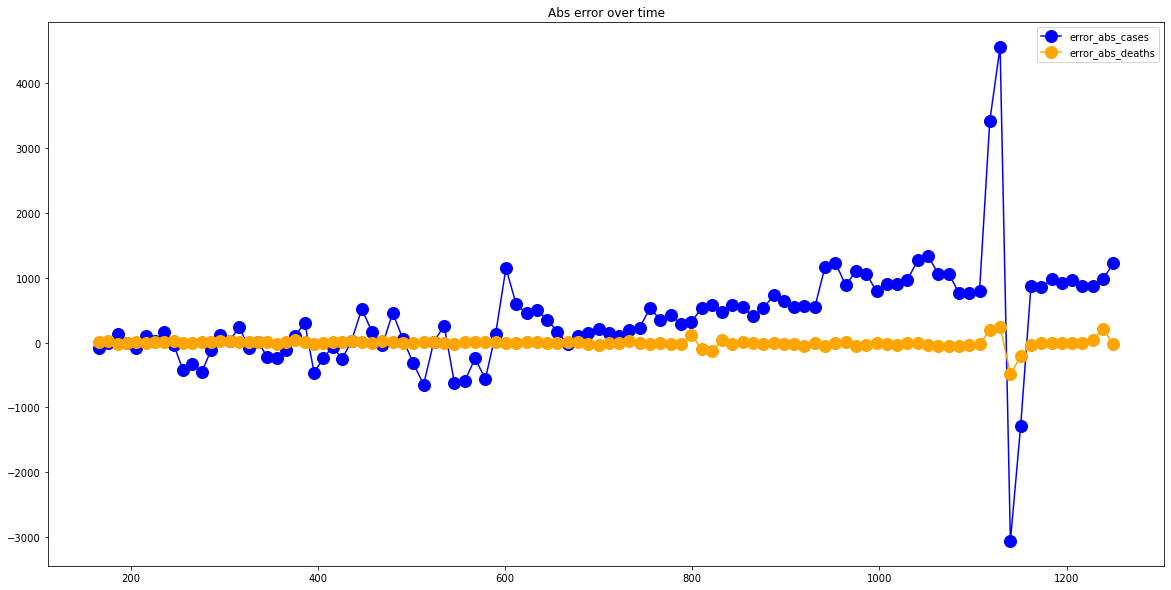

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  200.12745098039215
RMSE =  342.8206099233757
-- Turkey performances for deaths --
MAE =  18.647058823529413
RMSE =  100.51124217679119


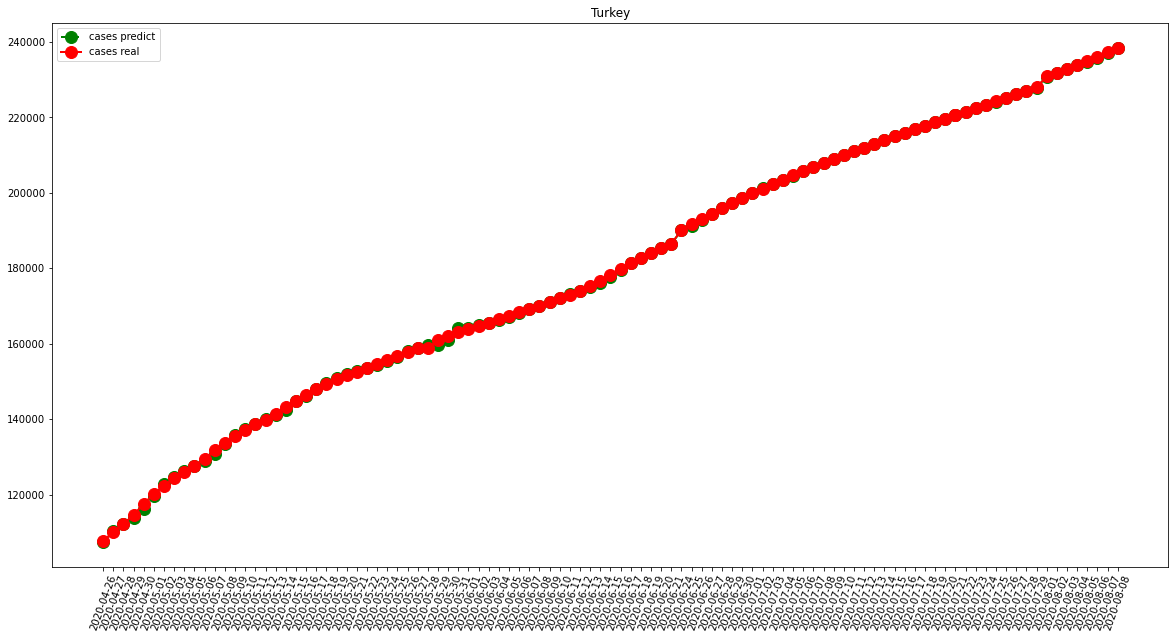

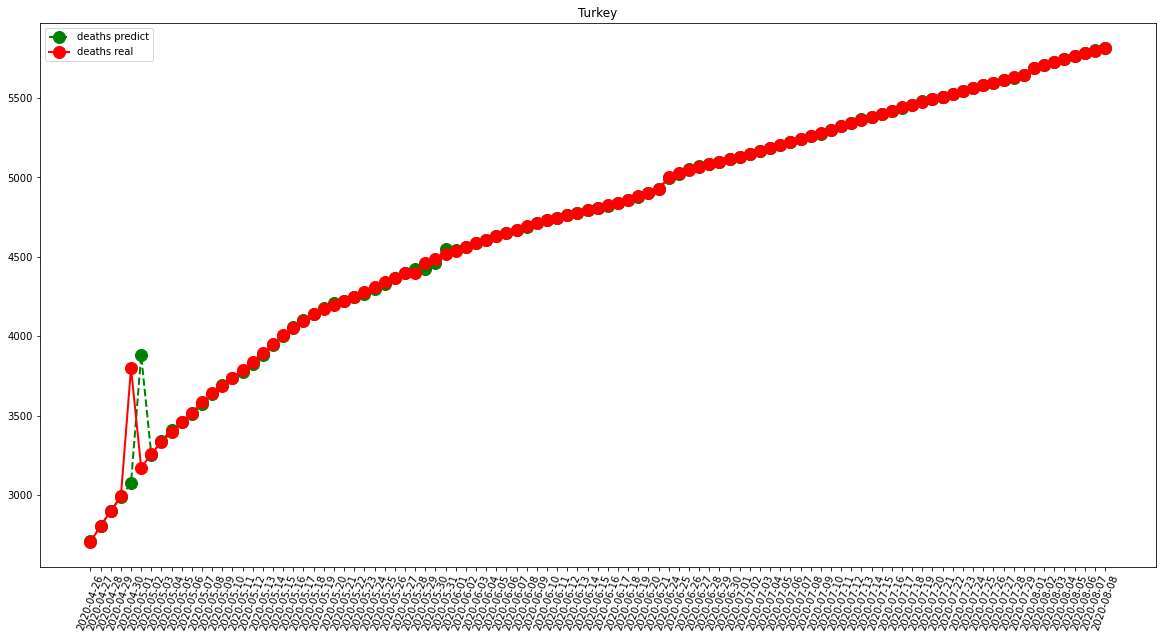

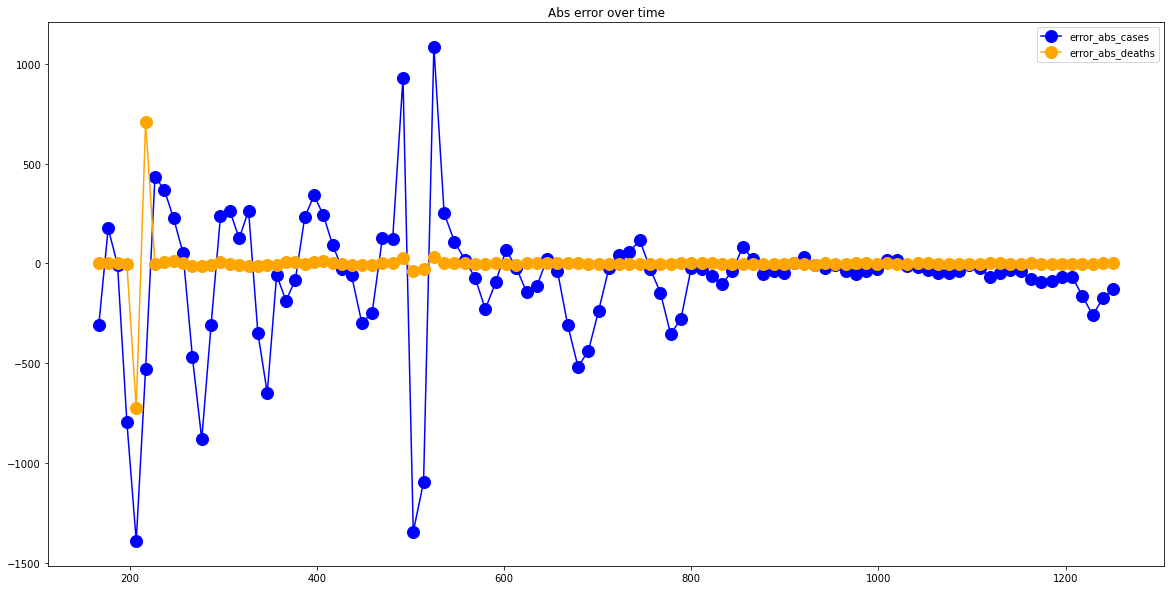

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11980.693333333333
RMSE =  15942.144962331762
-- Brazil performances for deaths --
MAE =  398.94666666666666
RMSE =  490.6633197349618


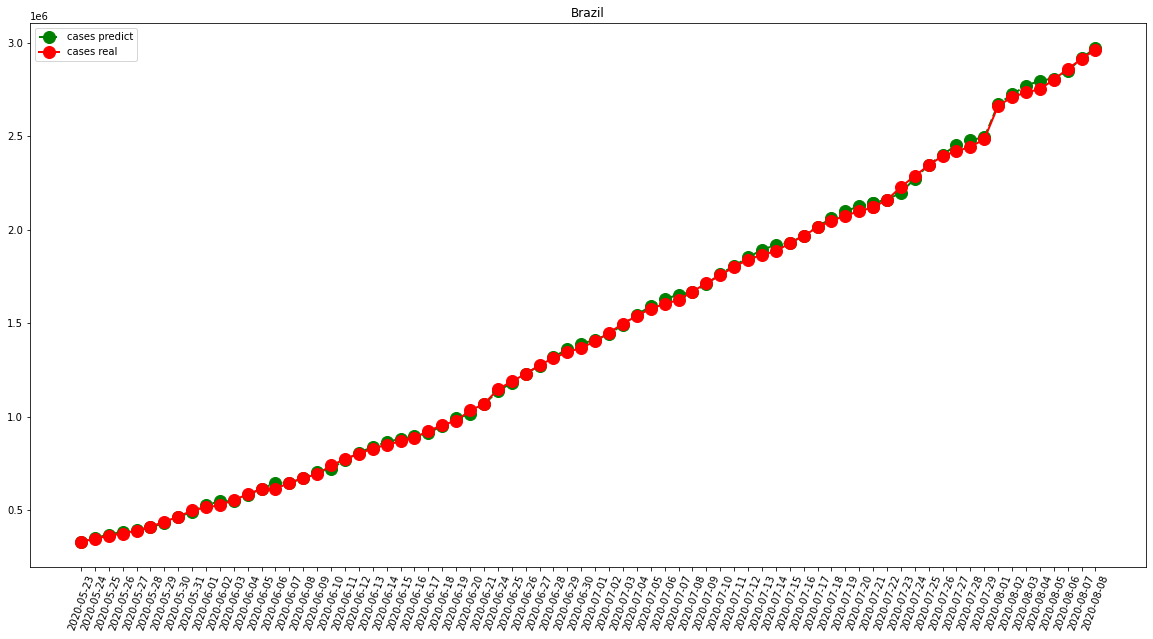

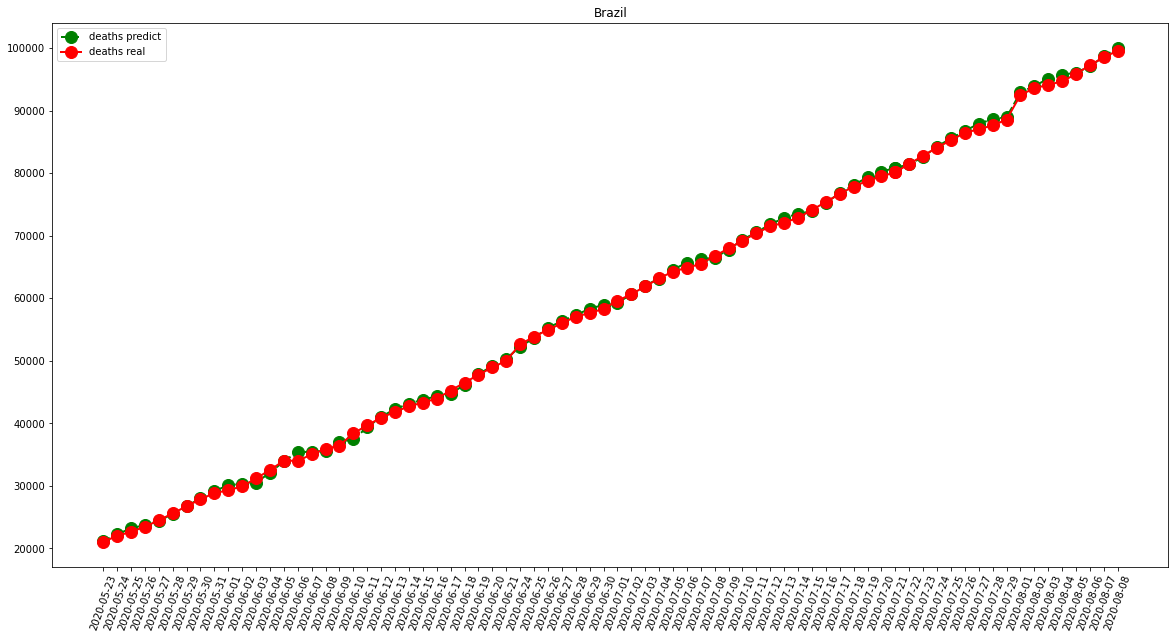

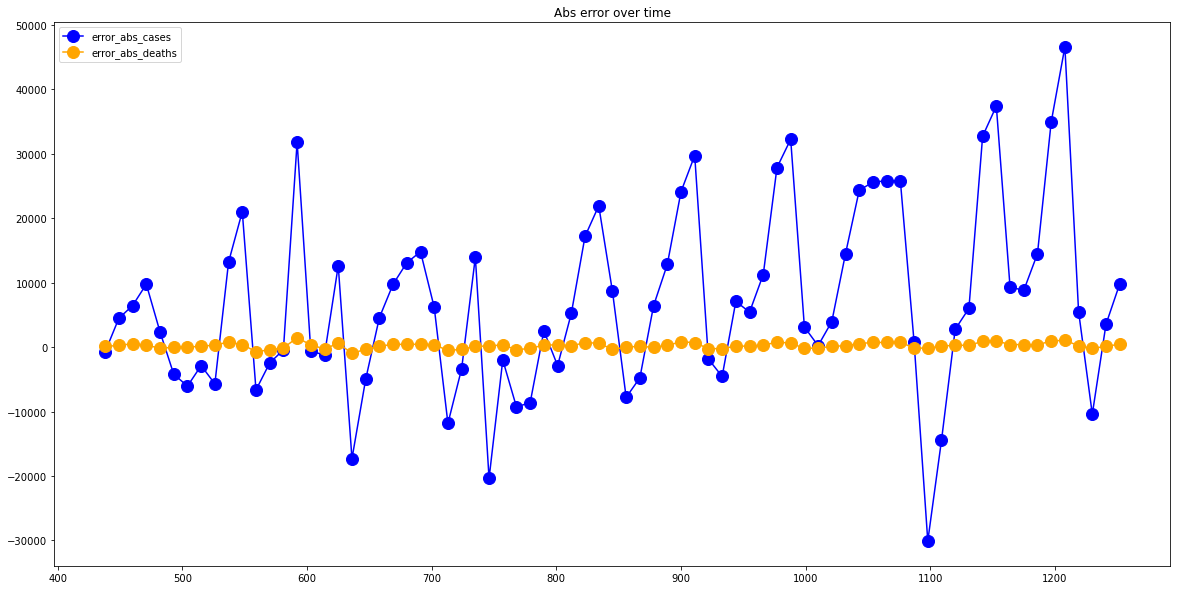

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)